# SF Home Prices
### Here is a practice notebook for looking at Redfin SF home prices and trying to get an idea of prices and sales
**Data**<br>
The data has been pulled from Redfin using their tabluar data and downladed as a .csv.  I'm pulling down data every month to look at the current market and compare it to the past three months of sales.  I also want to look at how much over asking (or under?) that a home goes for.<br><br>
I'm looking at a filter of the data less than 1.25M and at least 3br 2ba homes in and around San Francisco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
# How to put together multiple .cvs files together
combined_csv = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))

In [3]:
# Drop the open house column because that isn't relevant
combined_csv.drop(['NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME'], axis=1, inplace=True)

In [4]:
# Double checking that there aren't any duplicates on the MLS#
combined_csv['MLS#'].duplicated().sum()

447

In [5]:
duplicates=combined_csv[combined_csv['MLS#'].duplicated()]

In [6]:
pd.set_option('display.max_rows', 10)
combined_csv.sort_values('MLS#')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,$/SQUARE FEET,HOA/MONTH,STATUS,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
263,For-Sale-by-Owner Listing,NaN,Single Family Residential,887 Myrtle St #10,Oakland,CA,94607,887000.0,3.0,2.5,...,634.0,NaN,Active,http://www.redfin.com/CA/Oakland/887-Myrtle-St...,Fizber.com,11449494,N,Y,37.804864,-122.283532
94,MLS Listing,NaN,Single Family Residential,192 Belcrest,NaN,CA,94015,1250000.0,3.0,1.5,...,NaN,NaN,Active,http://www.redfin.com/CA/Daly-City/192-Belcres...,GEMLS,202112268,N,Y,37.664658,-122.492429
314,MLS Listing,NaN,Multi-Family (2-4 Unit),1422 98th,Oakland,CA,94603,720000.0,4.0,3.0,...,385.0,NaN,Active,http://www.redfin.com/CA/Oakland/1422-98th-Ave...,TheMLS,21-763804,N,Y,37.744597,-122.169572
340,MLS Listing,NaN,Single Family Residential,2531 Heide Ct,El Sobrante,CA,94803,1850000.0,5.0,3.5,...,446.0,NaN,Active,http://www.redfin.com/CA/El-Sobrante/2531-Heid...,SDMLS,210026028,N,Y,37.952530,-122.266497
24,PAST SALE,March-20-2020,Multi-Family (2-4 Unit),2637 E 16th St,Oakland,CA,94601,800000.0,4.0,4.0,...,191.0,NaN,Sold,http://www.redfin.com/CA/Oakland/2637-E-16th-S...,BAREIS,21921913,N,Y,37.782467,-122.230560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,PAST SALE,NaN,Single Family Residential,79 Karen Ct,San Francisco,CA,94134,1320000.0,4.0,3.0,...,714.0,NaN,NaN,http://www.redfin.com/CA/San-Francisco/79-Kare...,NaN,NaN,N,Y,37.723285,-122.406829
290,PAST SALE,NaN,Single Family Residential,224 Warren Dr,San Francisco,CA,94131,1600000.0,3.0,2.0,...,1117.0,NaN,NaN,http://www.redfin.com/CA/San-Francisco/224-War...,NaN,NaN,N,Y,37.754296,-122.460702
292,PAST SALE,NaN,Single Family Residential,851 32nd Ave,San Francisco,CA,94121,1000000.0,3.0,2.0,...,573.0,NaN,NaN,http://www.redfin.com/CA/San-Francisco/851-32n...,NaN,NaN,N,Y,37.773174,-122.492099
293,PAST SALE,NaN,Single Family Residential,85 Southridge Way,Daly City,CA,94014,1170000.0,4.0,2.0,...,867.0,NaN,NaN,http://www.redfin.com/CA/Daly-City/85-Southrid...,NaN,NaN,N,Y,37.706094,-122.428991


In [7]:
combined_csv['SALE TYPE'].unique()

array(['MLS Listing', 'Redfin Data', 'PAST SALE', 'New Construction Plan',
       'For-Sale-by-Owner Listing'], dtype=object)

In [8]:
combined_csv['STATUS'].unique()

array(['Active', 'Pre On-Market', 'Sold', nan], dtype=object)

In [9]:
# Separate the data into for sale and past sale for each group.

SALE=combined_csv[combined_csv['SALE TYPE'].isin(['MLS Listing','For-Sale-by-Owner Listing', 'New Construction Plan','Redfin Data'])]
PAST=combined_csv[combined_csv['SALE TYPE'].isin(['PAST SALE'])]

In [10]:
# Rename the price columns to either list price or sale price depending if they were bought or sold
SALE=SALE.rename(columns ={'PRICE':'LIST PRICE'})
PAST=PAST.rename(columns ={'PRICE':'SALE PRICE'})

In [11]:
# Drop the URL data cause it isn't relevant to my calculations
SALE.drop('URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', axis=1, inplace=True)
PAST.drop('URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', axis=1, inplace=True)
#SALE.drop('SOLD DATE') # Considering dropping this one because it's only a sold date in the past when it's actually sold

In [12]:
print(SALE.shape,PAST.shape)

(1956, 24) (437, 24)


In [13]:
# Attempt to make a list of features that don't overlap on each so I can merge the data better
features = list(SALE.keys())
features.remove('SALE TYPE')
features.remove('SOLD DATE')
features.remove('STATUS')
features.remove('LIST PRICE')
features.remove('DAYS ON MARKET')
features.remove('HOA/MONTH')
features
# This made a mess of things

['PROPERTY TYPE',
 'ADDRESS',
 'CITY',
 'STATE OR PROVINCE',
 'ZIP OR POSTAL CODE',
 'BEDS',
 'BATHS',
 'LOCATION',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 '$/SQUARE FEET',
 'SOURCE',
 'MLS#',
 'FAVORITE',
 'INTERESTED',
 'LATITUDE',
 'LONGITUDE']

In [14]:
df0=SALE.merge(PAST,on=['MLS#','ADDRESS'], how="left")
df0.sort_values('ADDRESS')

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,LIST PRICE,BEDS_x,BATHS_x,...,YEAR BUILT_y,DAYS ON MARKET_y,$/SQUARE FEET_y,HOA/MONTH_y,STATUS_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y
1379,MLS Listing,NaN,Multi-Family (2-4 Unit),1 - 3 Downey St,San Francisco,CA,94117,2599000.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,MLS Listing,NaN,Single Family Residential,1 Hill Point Ave,San Francisco,CA,94117,2999000.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1698000.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1775000.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1546,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1698000.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,MLS Listing,NaN,Single Family Residential,NaN,San Leandro,CA,94578,775000.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609,MLS Listing,NaN,Single Family Residential,NaN,San Francisco,CA,94122,1888888.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1617,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SALE TYPE_x           1971 non-null   object 
 1   SOLD DATE_x           0 non-null      object 
 2   PROPERTY TYPE_x       1971 non-null   object 
 3   ADDRESS               1963 non-null   object 
 4   CITY_x                1970 non-null   object 
 5   STATE OR PROVINCE_x   1971 non-null   object 
 6   ZIP OR POSTAL CODE_x  1971 non-null   object 
 7   LIST PRICE            1971 non-null   float64
 8   BEDS_x                1960 non-null   float64
 9   BATHS_x               1934 non-null   float64
 10  LOCATION_x            1970 non-null   object 
 11  SQUARE FEET_x         1935 non-null   float64
 12  LOT SIZE_x            1935 non-null   float64
 13  YEAR BUILT_x          1911 non-null   float64
 14  DAYS ON MARKET_x      1964 non-null   float64
 15  $/SQUARE FEET_x      

In [16]:
# find out how much over asking the huses went for
df0['MARKUP']=df0['SALE PRICE']-df0['LIST PRICE']
df0

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,LIST PRICE,BEDS_x,BATHS_x,...,DAYS ON MARKET_y,$/SQUARE FEET_y,HOA/MONTH_y,STATUS_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y,MARKUP
0,MLS Listing,NaN,Single Family Residential,2986 Bella Dr,Concord,CA,94519,729000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000.0,3.0,2.0,...,15.0,631.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786508,-122.182077,131000.0
2,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000.0,3.0,2.0,...,65.0,631.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786508,-122.182077,131000.0
3,MLS Listing,NaN,Single Family Residential,14940 Riverdale St,San Leandro,CA,94578,799000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLS Listing,NaN,Single Family Residential,5366 Leona St,Oakland,CA,94619,995000.0,4.0,3.0,...,16.0,486.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786440,-122.175204,105000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,MLS Listing,NaN,Single Family Residential,2537 65th Ave,Oakland,CA,94605,599000.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,MLS Listing,NaN,Single Family Residential,931 Bancroft Way,Berkeley,CA,94710,1175000.0,5.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,MLS Listing,NaN,Multi-Family (2-4 Unit),2908 Folsom St,San Francisco,CA,94110,1595000.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,MLS Listing,NaN,Single Family Residential,7870 Burns Ct,El Cerrito,CA,94530,998000.0,3.0,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Wait a minute.  I think this merge didn't go well. 
df0['MLS#'].duplicated().sum()
# Yep.  There are duplicates in the MLS# so it didn't merge correctly.  I shouldn't have this.

337

In [18]:
df0['MARKUP'].describe()

count        47.000000
mean     147329.829787
std      146464.756777
min      -34000.000000
25%       51000.000000
50%      105000.000000
75%      206000.000000
max      624500.000000
Name: MARKUP, dtype: float64

<AxesSubplot:ylabel='Frequency'>

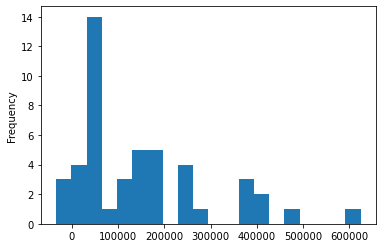

In [19]:
# The issue here is some data is the same in both... So I need only the data that changes from one to another. 
# I need to only look at asking vs sold not data vs data1 prices
df0['MARKUP'].plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

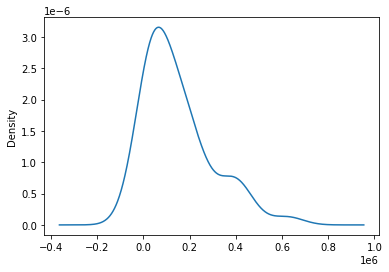

In [20]:
df0['MARKUP'].plot.kde()

In [21]:
# most houses are marked up between 20-40%... That could be a lot for a million dollar home.

In [22]:
# Lets try this again but only get a few columns from the past data so I don't have as many address_x and address_y and the lot.
df1=SALE.merge(PAST[['SOLD DATE', 'ADDRESS', 'MLS#', 'SALE PRICE']],on=['MLS#','ADDRESS'], how="inner")
df1.sort_values('ADDRESS')

,SALE TYPE,SOLD DATE_x,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LIST PRICE,BEDS,BATHS,...,HOA/MONTH,STATUS,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,SOLD DATE_y,SALE PRICE
25,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,869000.0,4.0,2.0,...,NaN,Active,MLSListings,ML81857591,N,Y,37.806163,-122.284218,October-18-2021,865000.0
24,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,899000.0,4.0,2.0,...,NaN,Active,MLSListings,ML81857591,N,Y,37.806163,-122.284218,October-18-2021,865000.0
38,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,NaN,Active,MLSListings,ML81864123,N,Y,37.740970,-122.448427,October-29-2021,1500000.0
37,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,NaN,Active,MLSListings,ML81864123,N,Y,37.740970,-122.448427,October-29-2021,1500000.0
21,MLS Listing,NaN,Single Family Residential,1415 Peralta St,Oakland,CA,94607,849000.0,3.0,3.5,...,NaN,Active,San Francisco MLS,421576294,N,Y,37.811771,-122.293909,September-7-2021,960000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,August-27-2021,1250000.0
10,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,August-27-2021,1250000.0
11,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,August-27-2021,1250000.0
6,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,August-27-2021,1250000.0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           47 non-null     object 
 1   SOLD DATE_x         0 non-null      object 
 2   PROPERTY TYPE       47 non-null     object 
 3   ADDRESS             47 non-null     object 
 4   CITY                47 non-null     object 
 5   STATE OR PROVINCE   47 non-null     object 
 6   ZIP OR POSTAL CODE  47 non-null     object 
 7   LIST PRICE          47 non-null     float64
 8   BEDS                47 non-null     float64
 9   BATHS               47 non-null     float64
 10  LOCATION            47 non-null     object 
 11  SQUARE FEET         46 non-null     float64
 12  LOT SIZE            45 non-null     float64
 13  YEAR BUILT          47 non-null     float64
 14  DAYS ON MARKET      47 non-null     float64
 15  $/SQUARE FEET       46 non-null     float64
 16  HOA/MONTH 

In [24]:
df1['MARKUP']=df1['SALE PRICE']-df1['LIST PRICE']
df1['MARKUP'].describe()

count        47.000000
mean     147329.829787
std      146464.756777
min      -34000.000000
25%       51000.000000
50%      105000.000000
75%      206000.000000
max      624500.000000
Name: MARKUP, dtype: float64

<AxesSubplot:ylabel='Density'>

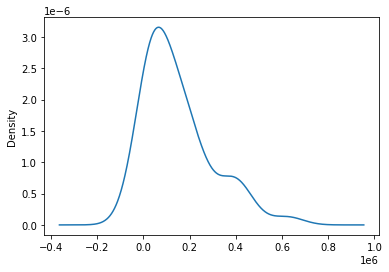

In [25]:
df1['MARKUP'].plot.kde()

In [26]:
print(df0['MARKUP'].describe())
print('')
print(df1['MARKUP'].describe())

count        47.000000
mean     147329.829787
std      146464.756777
min      -34000.000000
25%       51000.000000
50%      105000.000000
75%      206000.000000
max      624500.000000
Name: MARKUP, dtype: float64

count        47.000000
mean     147329.829787
std      146464.756777
min      -34000.000000
25%       51000.000000
50%      105000.000000
75%      206000.000000
max      624500.000000
Name: MARKUP, dtype: float64


In [27]:
print("Most houses are marked up by $",df1['MARKUP'].mode())

Most houses are marked up by $ 0    51000.0
dtype: float64


In [28]:
# same answer and looks neater.

In [29]:
SALE_1=SALE[SALE['LIST PRICE']<=1250000]

In [30]:
df2=SALE_1.merge(PAST[['SOLD DATE', 'ADDRESS', 'MLS#', 'SALE PRICE']],on=['MLS#','ADDRESS'], how="inner")
df2['MARKUP']=df2['SALE PRICE']-df2['LIST PRICE']
df2['MARKUP'].describe()

count        41.000000
mean     133036.634146
std      143392.962081
min      -34000.000000
25%       51000.000000
50%       87000.000000
75%      176000.000000
max      624500.000000
Name: MARKUP, dtype: float64

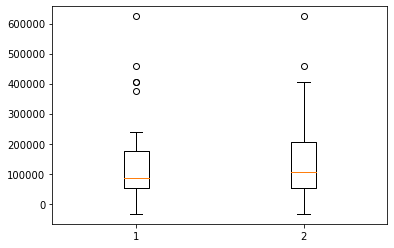

In [32]:
_=plt.boxplot([df2['MARKUP'],df1['MARKUP']])
plt.show()

In [ ]:
#Average markup $87,000, most houses are between $51,00 and $176,000.  So plan on having about $100K extra for bargining.